<a href="https://colab.research.google.com/github/vinothrajkumar05/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN and visualising decision boundaries**

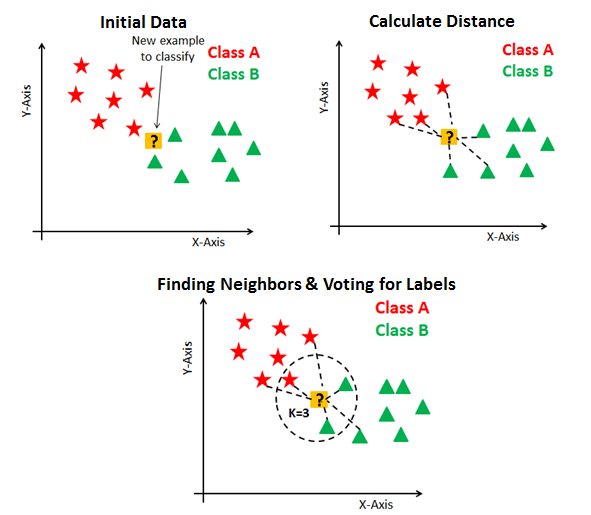

# **Performance of K for various types of datasets**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

In [ ]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels 
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x, y) # train the model
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=10)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('X') #Names the x-axis
  plt.ylabel('Y') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph 

def knn_no_plot(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels 
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x, y) # train the model
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  # Plotting decision region
  # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  # # Adding axes annotations
  # plt.xlabel('X') #Names the x-axis
  # plt.ylabel('Y') #Names the y-axis
  # plt.title('Knn with K='+ str(k)) #Names the graph
  # plt.show() #Displays the graph 

#Same as aboe, but with logreg
def logistic(data, k = 0):
  x = data[['X','Y']].values
  y = data['class'].astype(int).values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

# U shaped

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data1 = pd.read_csv('ushape.csv')
X = data1[['X','Y']].values
y = data1['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])) #predicting using the model


K value  :  1  score :  1.0
K value  :  2  score :  1.0
K value  :  3  score :  1.0
K value  :  4  score :  1.0
K value  :  5  score :  1.0
K value  :  6  score :  1.0
K value  :  7  score :  1.0
K value  :  8  score :  1.0
K value  :  9  score :  1.0
K value  :  10  score :  1.0
K value  :  20  score :  1.0
K value  :  50  score :  0.9027777777777778


In [ ]:
data1 = pd.read_csv('ushape.csv')
for i in [1,2,3,4,5,20,30,40,80]:
  print(i)
  knn_comparison(data1,i)
    

1
Train Accuracy :  1.0
Val Accuracy :  0.9199999999999999
2
Train Accuracy :  0.95
Val Accuracy :  0.9199999999999999
3
Train Accuracy :  0.96
Val Accuracy :  0.95
4
Train Accuracy :  0.96
Val Accuracy :  0.9400000000000001
5
Train Accuracy :  0.96
Val Accuracy :  0.95
20
Train Accuracy :  0.93
Val Accuracy :  0.93
30
Train Accuracy :  0.92
Val Accuracy :  0.9
40
Train Accuracy :  0.89
Val Accuracy :  0.85
80
Train Accuracy :  0.73
Val Accuracy :  0.69


# Concentric Circles

In [ ]:
data1 = pd.read_csv('concertriccir2.csv')
for i in [1,2,3,4,5,20,30,40,80]:
    knn_no_plot(data1, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.866
K :  2  Train Accuracy :  0.954  Val Accuracy :  0.858
K :  3  Train Accuracy :  0.952  Val Accuracy :  0.8640000000000001
K :  4  Train Accuracy :  0.938  Val Accuracy :  0.8619999999999999
K :  5  Train Accuracy :  0.934  Val Accuracy :  0.8800000000000001
K :  20  Train Accuracy :  0.888  Val Accuracy :  0.772
K :  30  Train Accuracy :  0.852  Val Accuracy :  0.736
K :  40  Train Accuracy :  0.822  Val Accuracy :  0.6940000000000001
K :  80  Train Accuracy :  0.684  Val Accuracy :  0.596


# XOR Dataset

In [ ]:
data3 = pd.read_csv('xor.csv')
for i in [1,2,3,4,5,20,30,40,60]:
   knn_no_plot(data3, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9560000000000001
K :  2  Train Accuracy :  0.984  Val Accuracy :  0.9639999999999999
K :  3  Train Accuracy :  0.984  Val Accuracy :  0.966
K :  4  Train Accuracy :  0.986  Val Accuracy :  0.962
K :  5  Train Accuracy :  0.98  Val Accuracy :  0.97
K :  20  Train Accuracy :  0.976  Val Accuracy :  0.954
K :  30  Train Accuracy :  0.962  Val Accuracy :  0.9480000000000001
K :  40  Train Accuracy :  0.972  Val Accuracy :  0.952
K :  60  Train Accuracy :  0.968  Val Accuracy :  0.914


# Linearly Separable

In [ ]:
data4 = pd.read_csv('linearsep.csv')
for i in [1,2,3,4,5,6,7,20,30,40,60]:
    knn_no_plot(data4, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9400000000000001
K :  2  Train Accuracy :  0.97  Val Accuracy :  0.9400000000000001
K :  3  Train Accuracy :  0.97  Val Accuracy :  0.97
K :  4  Train Accuracy :  0.96  Val Accuracy :  0.95
K :  5  Train Accuracy :  0.97  Val Accuracy :  0.95
K :  6  Train Accuracy :  0.95  Val Accuracy :  0.95
K :  7  Train Accuracy :  0.96  Val Accuracy :  0.9400000000000001
K :  20  Train Accuracy :  0.95  Val Accuracy :  0.9400000000000001
K :  30  Train Accuracy :  0.94  Val Accuracy :  0.9400000000000001
K :  40  Train Accuracy :  0.94  Val Accuracy :  0.9400000000000001
K :  60  Train Accuracy :  0.95  Val Accuracy :  0.9400000000000001


# Visualising the logistic regression decision boundary

0.95
Train Accuracy :  0.95
Val Accuracy :  0.95


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


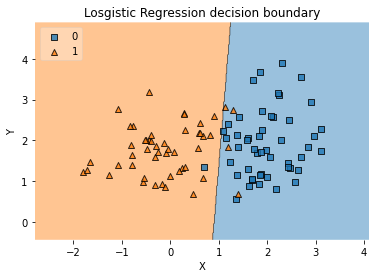

In [ ]:
logistic(data4,1)

0.456
Train Accuracy :  0.456
Val Accuracy :  0.476


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


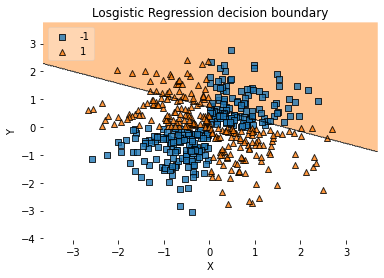

In [ ]:
logistic(data3,1)

In [ ]:
from sklearn.model_selection import cross_val_score
data = pd.read_csv('ushape.csv')
x = data[['X','Y']].values
y = data['class'].astype(int).values
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'accuracy').mean())

K value :  1  train score :  1.0  test score :  0.9199999999999999
K value :  2  train score :  0.95  test score :  0.9199999999999999
K value :  3  train score :  0.96  test score :  0.95
K value :  4  train score :  0.96  test score :  0.9400000000000001
K value :  5  train score :  0.96  test score :  0.95
K value :  6  train score :  0.96  test score :  0.93
K value :  7  train score :  0.96  test score :  0.9400000000000001
K value :  8  train score :  0.96  test score :  0.9199999999999999
K value :  9  train score :  0.95  test score :  0.93
K value :  10  train score :  0.92  test score :  0.9199999999999999
K value :  20  train score :  0.93  test score :  0.93
K value :  40  train score :  0.89  test score :  0.85
K value :  80  train score :  0.73  test score :  0.69
